In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model

In [3]:
reg = linear_model.LinearRegression()

In [4]:
reg.fit([[0,0],[1,1],[2,2]], [0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
reg.coef_

array([0.5, 0.5])

In [6]:
reg.intercept_

1.1102230246251565e-16

### Linear regression example

Automatically created module for IPython interactive environment
Coefficients: 
, [938.23786125]
Mean_squared_error: 2548.07
Variance score: 0.47


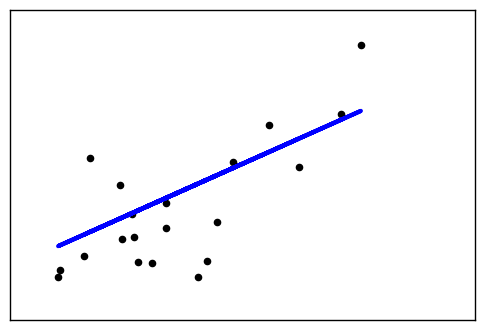

In [7]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

#load the diabetes dataset
diabetes = datasets.load_diabetes()

#use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
#spli the data into training and test data sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#splitting the targets into training testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

#create linear regression object
regr = linear_model.LinearRegression()

#train he model using the raining sets
regr.fit(diabetes_X_train, diabetes_y_train)

#make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

#the coefficients
print('Coefficients: \n,', regr.coef_)
#the mean squared error
print('Mean_squared_error: %.2f' % mean_squared_error(diabetes_y_test,diabetes_y_pred))
#print explained variance score: 1 is perfect prediction
print('Variance score: %0.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

#plot the ouputts
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Ridge Regression

Automatically created module for IPython interactive environment


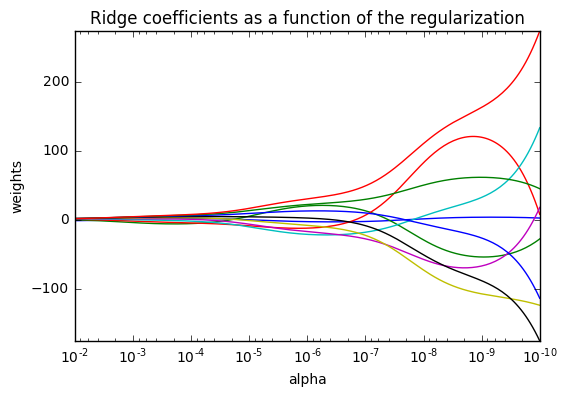

In [8]:
#ridge regression
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
# #############################################################################
# Compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)  

# Display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()    

### Lasso

Automatically created module for IPython interactive environment
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.385982
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240498


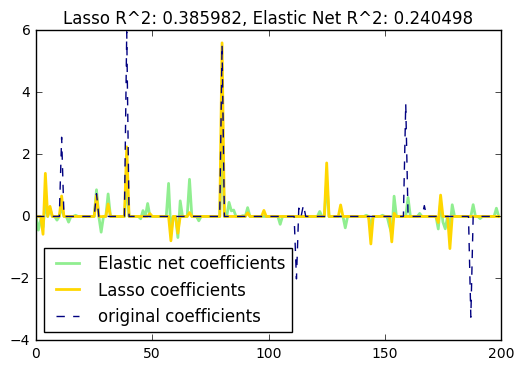

In [9]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# Generate some sparse data to play with
np.random.seed(42)
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0 # sparsify coef
y = np.dot(X, coef)
# add noise
y += 0.01 * np.random.normal(size=n_samples)
# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]
# #############################################################################
# Lasso
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)
# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
        % (r2_score_lasso, r2_score_enet))

### Compressive sensing: tomography reconstruction with L1 prior (Lasso)

In [ ]:
from __future__ import division
print(__doc__)
# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause
import numpy as np
from scipy import sparse

from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
def _weights(x, dx=1, orig=0):
x = np.ravel(x)
floor_x = np.floor((x - orig) / dx).astype(np.int64)
alpha = (x - orig - floor_x * dx) / dx
return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))
def _generate_center_coordinates(l_x):
X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
center = l_x / 2.
X += 0.5 - center
Y += 0.5 - center
return X, Y
def build_projection_operator(l_x, n_dir):
""" Compute the tomography design matrix.
Parameters
----------
l_x : int
linear size of image array
n_dir : int
number of angles at which projections are acquired.
Returns
-------
p : sparse matrix of shape (n_dir l_x, l_x**2)
"""
X, Y = _generate_center_coordinates(l_x)
angles = np.linspace(0, np.pi, n_dir, endpoint=False)
data_inds, weights, camera_inds = [], [], []
data_unravel_indices = np.arange(l_x ** 2)
data_unravel_indices = np.hstack((data_unravel_indices,
data_unravel_indices))
for i, angle in enumerate(angles):
Xrot = np.cos(angle) * X - np.sin(angle) * Y
inds, w = _weights(Xrot, dx=1, orig=X.min())
mask = np.logical_and(inds >= 0, inds < l_x)
weights += list(w[mask])
camera_inds += list(inds[mask] + i * l_x)
data_inds += list(data_unravel_indices[mask])
proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
return proj_operator
def generate_synthetic_data():
""" Synthetic binary data """
rs = np.random.RandomState(0)
n_pts = 36
x, y = np.ogrid[0:l, 0:l]
mask_outer = (x - l / 2.) ** 2 + (y - l / 2.) ** 2 < (l / 2.) ** 2
mask = np.zeros((l, l))
points = l * rs.rand(2, n_pts)
mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
res = np.logical_and(mask > mask.mean(), mask_outer)
return np.logical_xor(res, ndimage.binary_erosion(res))
# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l // 7)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)
# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)
# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)
plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')
plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
right=1)
plt.show()


### Lasso model selection: Cross-Validation / AIC / BIC

Automatically created module for IPython interactive environment
Computing regularization path using the coordinate descent lasso..


C:\Users\jeffnerd\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: divide by zero encountered in log10


Computing regularization path using LArs lasso..


C:\Users\jeffnerd\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: RuntimeWarning: divide by zero encountered in log10


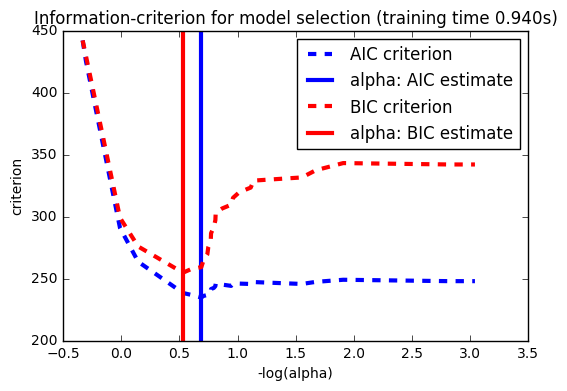

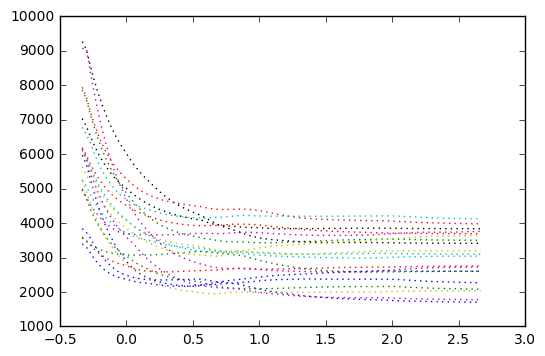

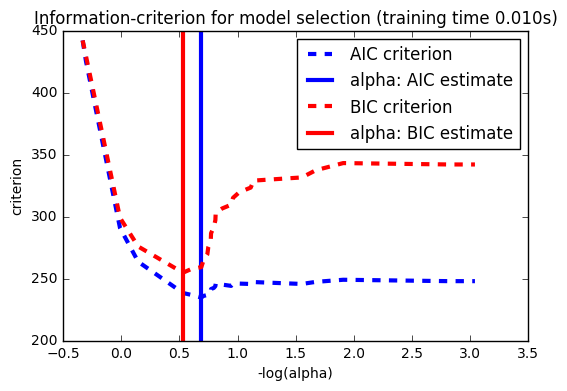

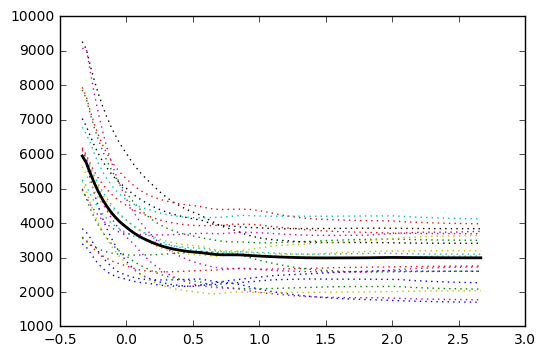

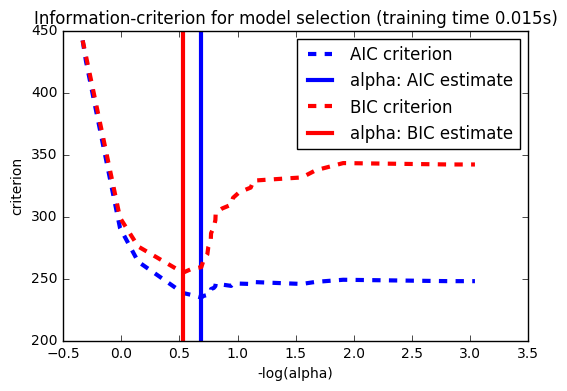

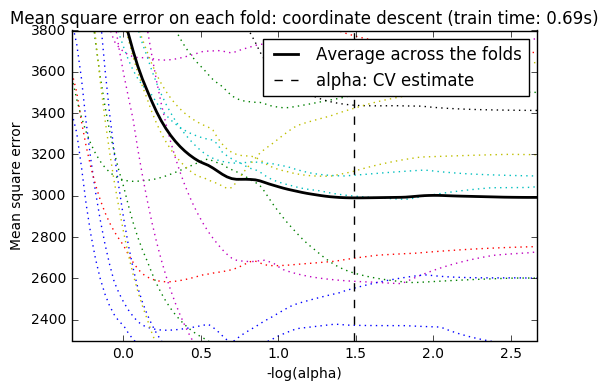

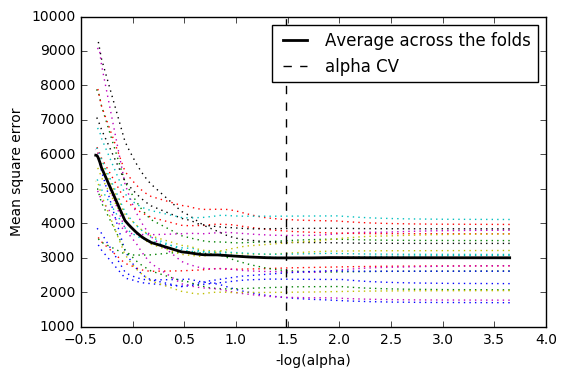

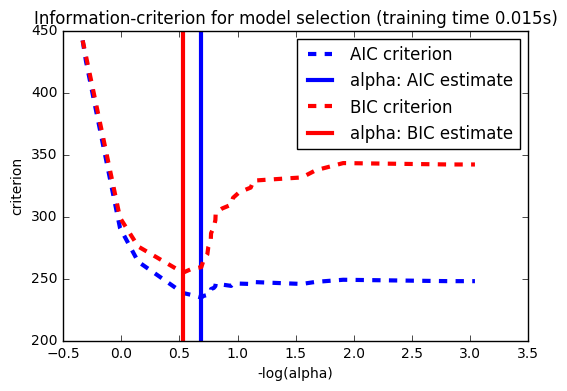

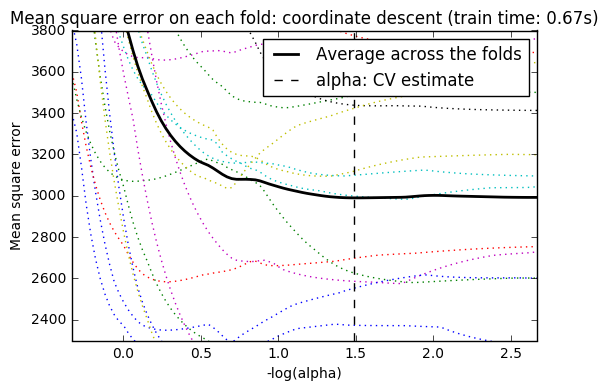

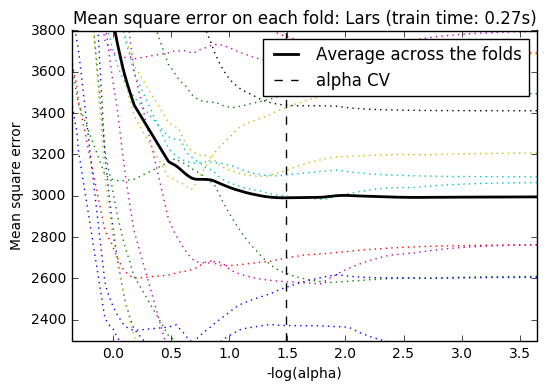

In [7]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)] #add some bad features

#normalize data as done by Lars to allow for comparision
X /= np.sqrt(np.sum(X ** 2, axis=0))

#LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X,y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_),  criterion_, '--', color=color,
             linewidth=3, label='%s criterion' %name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3, label='alpha: %s estimate' %name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)' %t_bic)

#LassoCV:  coordinae descent

#Compute paths
print("Computing regularization path using the coordinate descent lasso..")
t1 = time.time()
model = LassoCV(cv=20).fit(X,y)
t_lasso_cv = time.time() - t1

#Display the results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label = 'Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent (train time: %.2fs)' %t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

#LassoLarsCV: Least angle regression
#compute paths
print("Computing regularization path using LArs lasso..")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

#Display the results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label = 'Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label = 'alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)' %t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

Automatically created module for IPython interactive environment


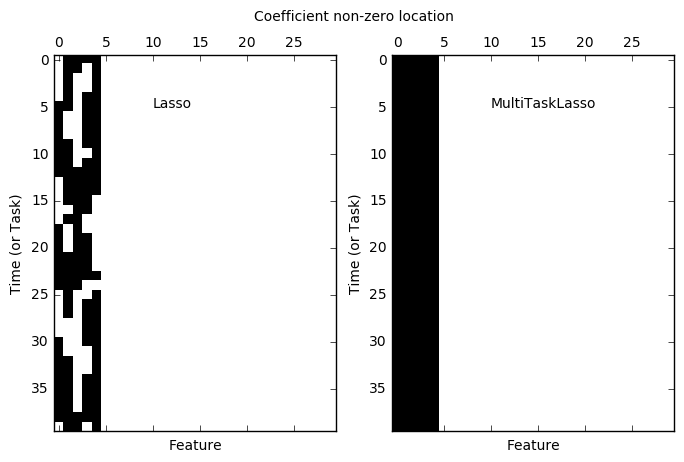

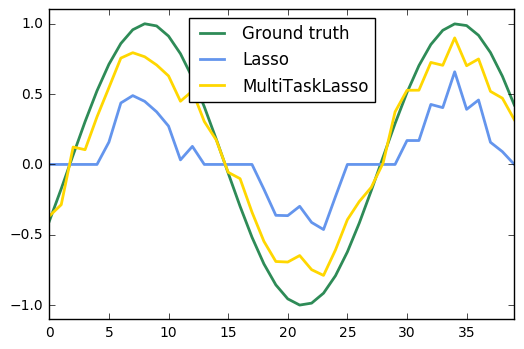

In [1]:
print(__doc__)
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import MultiTaskLasso, Lasso
rng = np.random.RandomState(42)
# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)

for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_
# #############################################################################
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')
feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

Automatically created module for IPython interactive environment


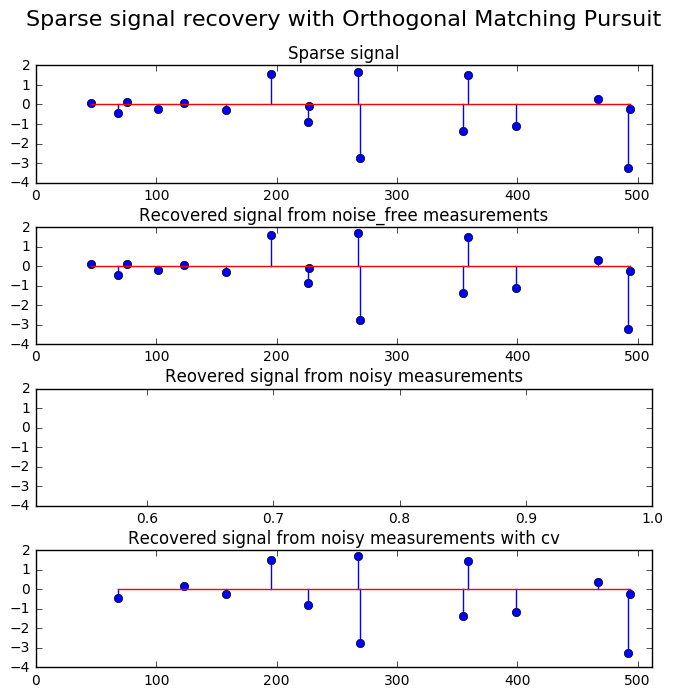

In [1]:
### Orthogonal matching pursuit
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

#generate data
# y = Xw
#/x/_0 = n_nonzero_coefs
y,X,w = make_sparse_coded_signal(n_samples=1,
                                 n_components=n_components,
                                 n_features = n_features,
                                 n_nonzero_coefs = n_nonzero_coefs,
                                 random_state = 0
                                )
idx, = w.nonzero()
#distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

#plot the sparse signal
plt.figure(figsize=(7,7))
plt.subplot(4,1,1)
plt.xlim(0,512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

#plot the noise free recosntruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X,y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,2)
plt.xlim(0,512)
plt.title("Recovered signal from noise_free measurements")
plt.stem(idx_r, coef[idx_r])

#plot the noisy construction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,3)
plt.xlim(0.512)
plt.title("Reovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

#Plt the nosiy reconstruction with number of non-zeros set by Cv
omp_cv = OrthogonalMatchingPursuitCV(cv=5)
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,4)
plt.xlim(0,512)
plt.title("Recovered signal from noisy measurements with cv")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit', fontsize=16)

plt.show()





Automatically created module for IPython interactive environment


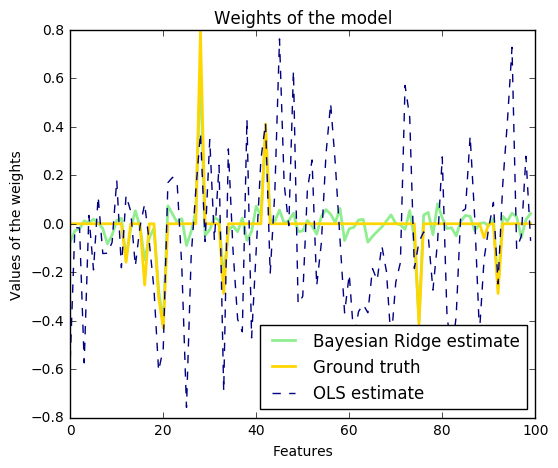

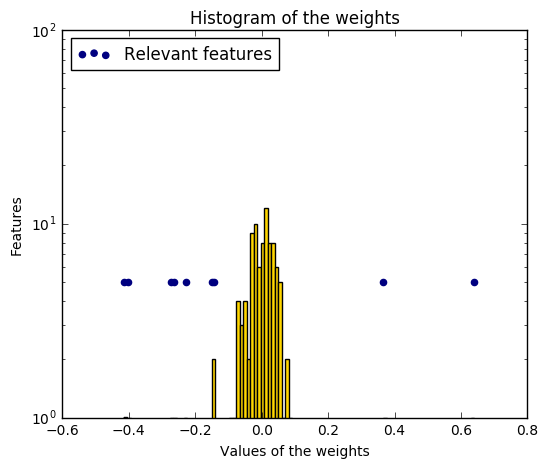

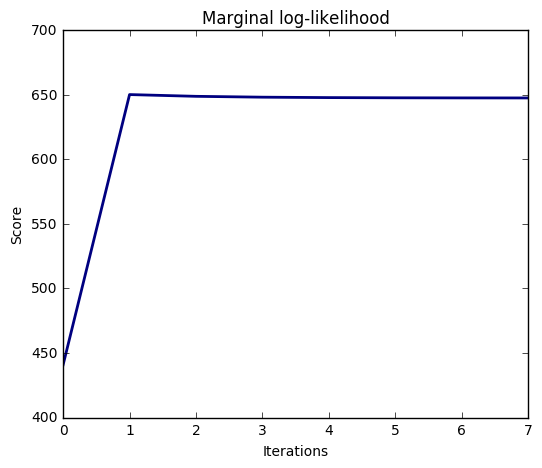

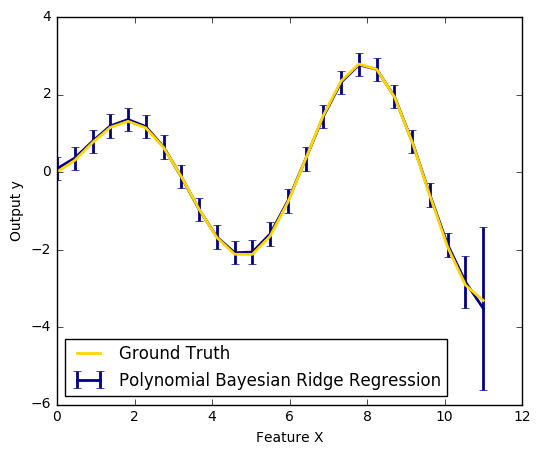

In [5]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression
# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features) # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)

for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

#############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)
ols = LinearRegression()
ols.fit(X, y)
# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)

plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()


Automatically created module for IPython interactive environment
C=1.00
Sparsity with L1 penality: 6.25%
Score with l1 penalty: 0.9082
Sparsity with L2 penality: 4.69%
Score with l2 penalty: 0.9082
C=0.10
Sparsity with L1 penality: 26.56%
Score with l1 penalty: 0.9026
Sparsity with L2 penality: 4.69%
Score with l2 penalty: 0.9026
C=0.01
Sparsity with L1 penality: 84.38%
Score with l1 penalty: 0.8620
Sparsity with L2 penality: 4.69%
Score with l2 penalty: 0.8620


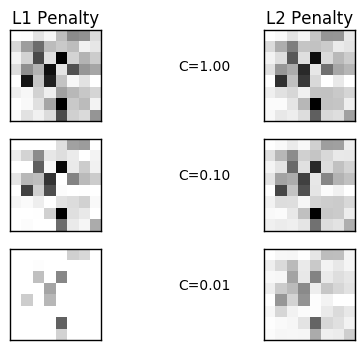

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

#classify small against large digits
y = (y > 4).astype(np.int)

#set regularizaion parameter
for i, C in enumerate((1,0.1,0.01)):
    #turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_l1_LR.fit(X,y)
    clf_l2_LR.fit(X,y)
    
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    
    #coef_l1_LR contains zeros due to the L1 sparsity inducing form
    
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    
    print("C=%.2f" %C)
    print("Sparsity with L1 penality: %.2f%%" %sparsity_l1_LR)
    print("Score with l1 penalty: %.4f" %clf_l1_LR.score(X,y))
    print("Sparsity with L2 penality: %.2f%%" %sparsity_l2_LR)
    print("Score with l2 penalty: %.4f" %clf_l1_LR.score(X,y))
    
    l1_plot = plt.subplot(3,2,2 * i + 1)
    l2_plot = plt.subplot(3,2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 Penalty")
        l2_plot.set_title("L2 Penalty")
        
    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8,8)), interpolation='nearest', cmap='binary',
                  vmax=1, vmin = 0) 
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8,8)), interpolation='nearest', cmap='binary',
                  vmax=1, vmin = 0) 
    plt.text(-8, 3, "C=%.2f" %C)
    
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    
plt.show()    
    
    
    

Automatically created module for IPython interactive environment
Computing regularization path ...
This took 8.375s


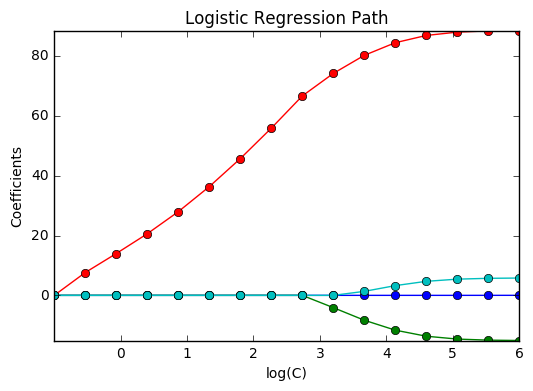

In [5]:
print(__doc__)
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]
X /= X.max() # Normalize X to speed-up convergence
# #############################################################################
# Demo path functions
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)
print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))
coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)


C:\Users\jeffnerd\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\jeffnerd\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


training score : 0.976 (ovr)


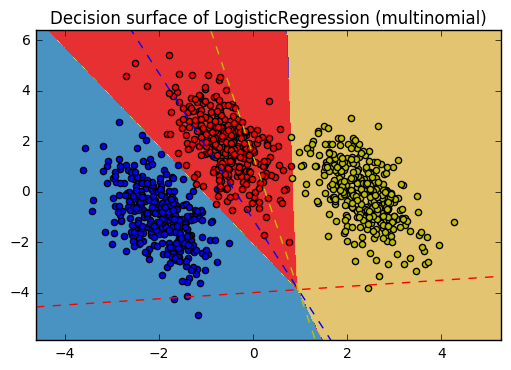

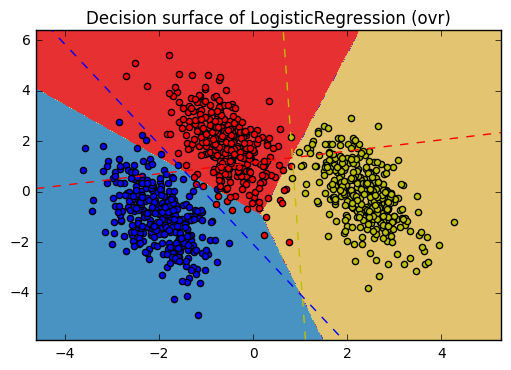

In [6]:
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                         multi_class=multi_class).fit(X, y)
    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))
    # create a mesh to plot in
    h = .02 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')
    
    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

        # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

C:\Users\jeffnerd\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\jeffnerd\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


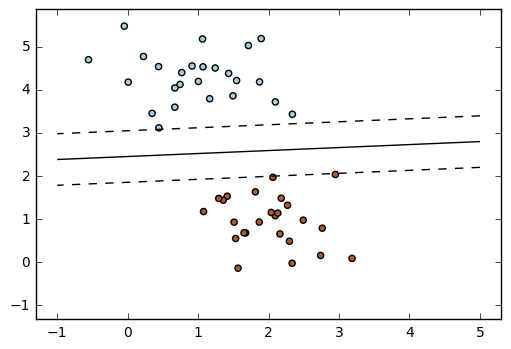

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs
# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)
# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
edgecolor='black', s=20)
plt.axis('tight')
plt.show()

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


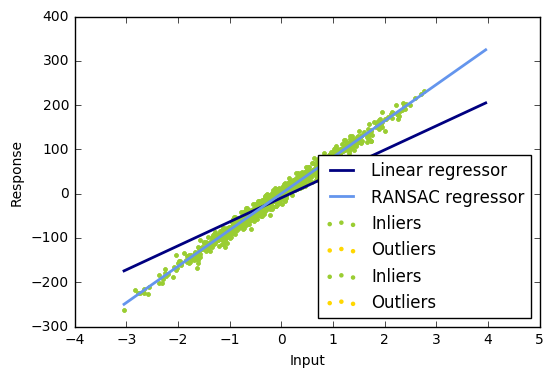

In [8]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets

n_samples = 1000
n_outliers = 50

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

#add outlier data
np.random.seed(0)

X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers,1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

#Fit line using all the data
lr = linear_model.LinearRegression()
lr.fit(X,y)

#Robustly fit the linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

#predict data of estimated models
line_X = np.arange(X.min(), X.max())[:,np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

#compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', 
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
           label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, 
        label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()


training SGD
training ASGD
training Perceptron
training Passive-Aggressive 1
training Passive-Aggressive II
training SAG


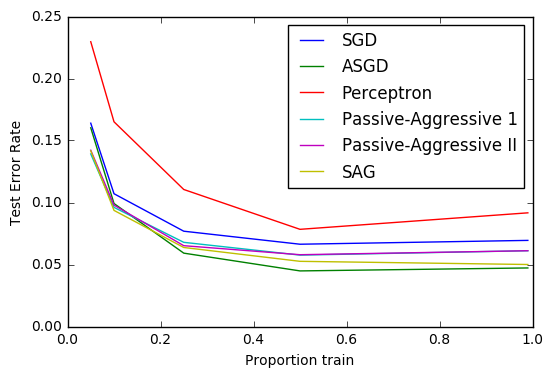

In [10]:
#comparing how different online solvers perform on hand-written digits datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
X,y = digits.data, digits.target

classifiers = [
    ("SGD", SGDClassifier(max_iter=100)),
    ("ASGD", SGDClassifier(average=True, max_iter=100)),
    ("Perceptron", Perceptron(tol=1e-3)),
    ("Passive-Aggressive 1", PassiveAggressiveClassifier(loss='hinge',
                                                        C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                         C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4/X.shape[0]))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" %name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X,y,test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)
    
plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()